In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import athena4_read as ath
#import athena_read as ath
#from main import loadData


In [12]:
import yt
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, VolumeSource


# fdir =  '/tigress/jiming/reconnect/athena/bin/'
# #targ = 'x2y4z1r256pm1re8000/'
# targ = 'x2y4z1r512pm1re16000/'
# fname = fdir+targ+'Unstra.out2.00045.athdf'
# ds=yt.load(fname)
# sc = yt.create_scene(ds)
# region=ds.r[0.3:0.7,-0.2:0.2,-0.5:-0.1]


In [127]:
# fname = '/tigress/jiming/usb_dynamo/x1y4z2r128/data/Unstra.0000.vtk'
# ds = yt.load(fname)
#ds = yt.load_uniform_grid(data, (320,144,320,3) #data[...,0].shape,bbox=np.array([[z[0], z[-1]], [y[0], y[-1]], [x[0], x[-1]]]))

In [129]:
#create yt ds from python dictionary read in via athena_read
import yt
import athena_read as ath
fdir =  '/tigress/jiming/reconnect/athena/bin/'
#targ = 'x2y4z1r256pm1re8000/'
targ = 'time_x2y4z1r512pm1re16000/'
fname = fdir+targ+'box.00000.vtk' #'modified.vtk'
t,x,y,z,data=ath.vtk(fname)
#sc = yt.create_scene(ds)


xs,xe,nx = x[0],x[-1],len(x)-1
ys,ye,ny = y[0],y[-1],len(y)-1
zs,ze,nz = z[0],z[-1],len(z)-1
ndir = 3
bbox =  np.array([[xs, xe], [ys, ye], [zs, ze]])

tmp = dict(density=data['rho'],vel1=data['vel'][...,0],vel2=data['vel'][...,1],vel3=data['vel'][...,2],\
          Bcc1=data['Bcc'][...,0],Bcc2=data['Bcc'][...,1],Bcc3=data['Bcc'][...,2])


ds = yt.load_uniform_grid(tmp, [nz, ny, nx], bbox=bbox,length_unit=1,time_unit=1,geometry=("cartesian",("z","y","x")))

yt : [INFO     ] 2017-07-24 14:48:52,526 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-07-24 14:48:52,527 Parameters: domain_dimensions         = [320 144 320]
yt : [INFO     ] 2017-07-24 14:48:52,528 Parameters: domain_left_edge          = [ 0.25      -0.2857143 -0.5      ]
yt : [INFO     ] 2017-07-24 14:48:52,529 Parameters: domain_right_edge         = [ 0.875      0.2857143  0.125    ]
yt : [INFO     ] 2017-07-24 14:48:52,530 Parameters: cosmological_simulation   = 0.0


In [142]:
print ds.field_info["stream","dx"]

Alias Field for "('index', 'dx')" (stream, dx): (units: code_length)


In [131]:
from yt import derived_field

# 1) add grid
def _x(field, data):
    return data["index","x"]
def _y(field, data):
    return data["index","y"]
def _z(field, data):
    return data["index","z"]

ds.add_field(('stream','x'), function=_x, take_log=False,
             display_name='x')
ds.add_field(('stream','y'), function=_y, take_log=False,
             display_name='y')
ds.add_field(('stream','z'), function=_z, take_log=False,
             display_name='z')

def _dx(field, data):
    return data["index","dx"]
def _dy(field, data):
    return data["index","dy"]
def _dz(field, data):
    return data["index","dz"]

ds.add_field(('stream','dx'), function=_dx, take_log=False,
             display_name='dx')
ds.add_field(('stream','dy'), function=_dy, take_log=False,
             display_name='dy')
ds.add_field(('stream','dz'), function=_dz, take_log=False,
             display_name='dz')

grad_fields = ds.add_gradient_fields(("stream","density"))
grad_fields = ds.add_gradient_fields(("stream","vel1"))
grad_fields = ds.add_gradient_fields(("stream","vel2"))
grad_fields = ds.add_gradient_fields(("stream","vel3"))
grad_fields = ds.add_gradient_fields(("stream","Bcc1"))
grad_fields = ds.add_gradient_fields(("stream","Bcc2"))
grad_fields = ds.add_gradient_fields(("stream","Bcc3"))



# print ds.field_list
# print
# print ds.derived_field_list

yt : [WARNING  ] 2017-07-24 14:49:55,133 Field ('stream', 'x') already exists. To override use force_override=True.
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
yt : [WARNING  ] 2017-07-24 14:49:55,135 Field ('stream', 'y') already exists. To override use force_override=True.
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
yt : [WARNING  ] 2017-07-24 14:49:55,137 Field ('stream', 'z') already exists. To override use force_override=True.
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
yt : [WARNING  ] 2017-07-24 14:49:55,139 Field ('stream', 'dx') already exists. To override use f

In [143]:
def _Jx(field, data):
    return data["Bcc3_gradient_y"]-data["Bcc2_gradient_z"]
def _Jy(field, data):
    return data["Bcc1_gradient_z"]-data["Bcc3_gradient_x"]
def _Jz(field, data):
    return data["Bcc2_gradient_x"]-data["Bcc1_gradient_y"]

ds.add_field(('stream','Jx'), function=_Jx, take_log=False,units="1/code_length",
             display_name='Jx')
ds.add_field(('stream','Jy'), function=_Jy, take_log=False,units="1/code_length",
             display_name='Jy')
ds.add_field(('stream','Jz'), function=_Jz, take_log=False,units='1/code_length',
             display_name='Jz')

def _Jmag(field, data):
    return np.sqrt(data["Jx"]**2+data["Jy"]**2+data["Jz"]**2)
ds.add_field(('stream','Jmag'), function=_Jx, take_log=False,units='1/code_length',
             display_name='Jmag')

/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'


/tigress/jiming/local/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'


In [149]:
print ds.derived_field_list


[('index', 'cell_volume'), ('index', 'dx'), ('index', 'dy'), ('index', 'dz'), ('index', 'x'), ('index', 'y'), ('index', 'z'), ('stream', 'Bcc1_gradient_magnitude'), ('stream', 'Bcc1_gradient_x'), ('stream', 'Bcc1_gradient_y'), ('stream', 'Bcc1_gradient_z'), ('stream', 'Bcc2_gradient_magnitude'), ('stream', 'Bcc2_gradient_x'), ('stream', 'Bcc2_gradient_y'), ('stream', 'Bcc2_gradient_z'), ('stream', 'Bcc3_gradient_magnitude'), ('stream', 'Bcc3_gradient_x'), ('stream', 'Bcc3_gradient_y'), ('stream', 'Bcc3_gradient_z'), ('stream', 'Jmag'), ('stream', 'Jx'), ('stream', 'Jy'), ('stream', 'Jz'), ('stream', 'density_gradient_magnitude'), ('stream', 'density_gradient_x'), ('stream', 'density_gradient_y'), ('stream', 'density_gradient_z'), ('stream', 'dx'), ('stream', 'dy'), ('stream', 'dz'), ('stream', 'vel1_gradient_magnitude'), ('stream', 'vel1_gradient_x'), ('stream', 'vel1_gradient_y'), ('stream', 'vel1_gradient_z'), ('stream', 'vel2_gradient_magnitude'), ('stream', 'vel2_gradient_x'), ('st

yt : [INFO     ] 2017-07-24 14:57:21,476 xlim = 0.250000 0.875000
yt : [INFO     ] 2017-07-24 14:57:21,477 ylim = -0.500000 0.125000
yt : [INFO     ] 2017-07-24 14:57:21,479 xlim = 0.250000 0.875000
yt : [INFO     ] 2017-07-24 14:57:21,479 ylim = -0.500000 0.125000
yt : [INFO     ] 2017-07-24 14:57:21,482 Making a fixed resolution buffer of (('stream', 'Jmag')) 800 by 800
yt : [INFO     ] 2017-07-24 14:57:21,739 Making a fixed resolution buffer of (('stream', 'Jmag')) 800 by 800



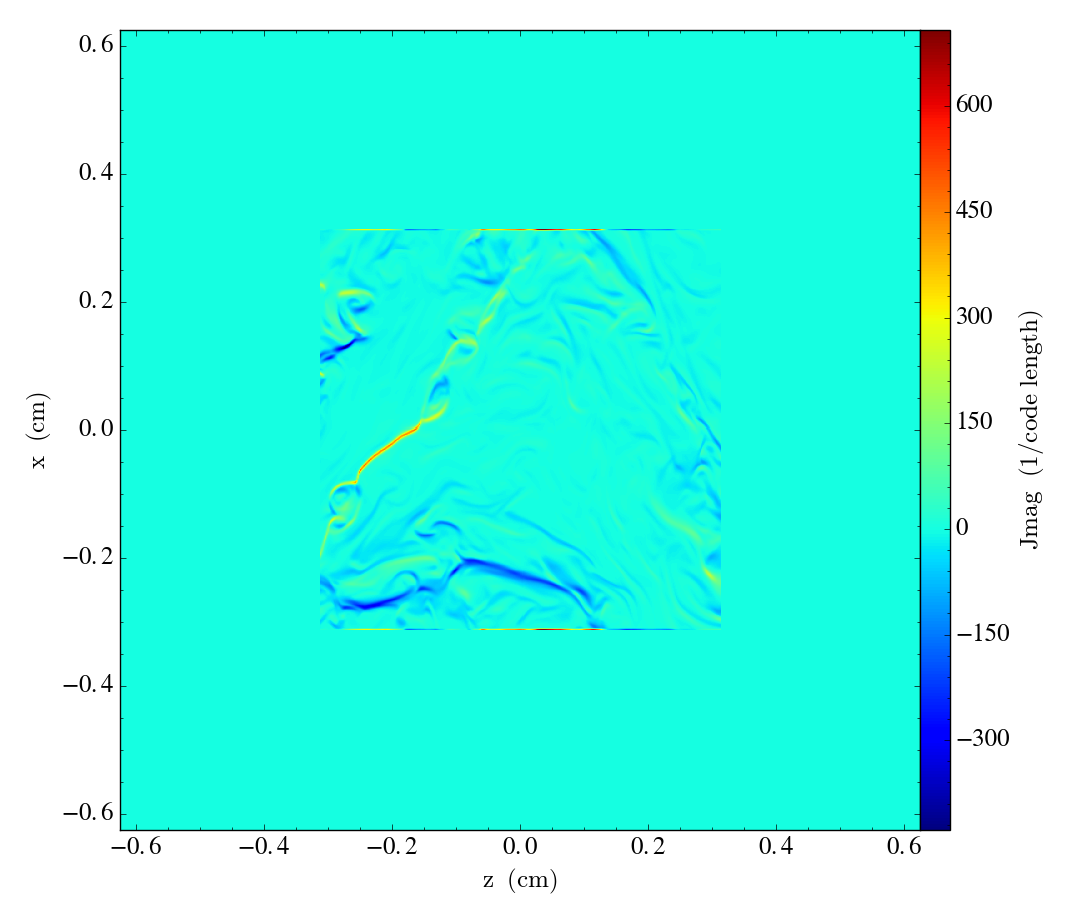

In [148]:
ds.periodicity = (True, True, True)
s=yt.SlicePlot(ds,"y","Jmag")
s.set_log("Jmag",False)
s.set_cmap("Jmag","jet")
s.zoom(0.5)
s.show()

yt : [INFO     ] 2017-07-21 16:18:23,751 xlim = 0.250000 0.875000
yt : [INFO     ] 2017-07-21 16:18:23,752 ylim = -0.500000 0.125000
yt : [INFO     ] 2017-07-21 16:18:23,753 xlim = 0.250000 0.875000
yt : [INFO     ] 2017-07-21 16:18:23,754 ylim = -0.500000 0.125000
yt : [INFO     ] 2017-07-21 16:18:23,756 Making a fixed resolution buffer of (('stream', 'Bcc1')) 800 by 800
yt : [WARNING  ] 2017-07-21 16:18:23,827 Plot image for field ('stream', 'Bcc1') has both positive and negative values. Min = -1.217896, Max = 1.262583.
yt : [WARNING  ] 2017-07-21 16:18:23,827 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2017-07-21 16:18:24,046 Making a fixed resolution buffer of (('stream', 'Bcc1')) 800 by 800



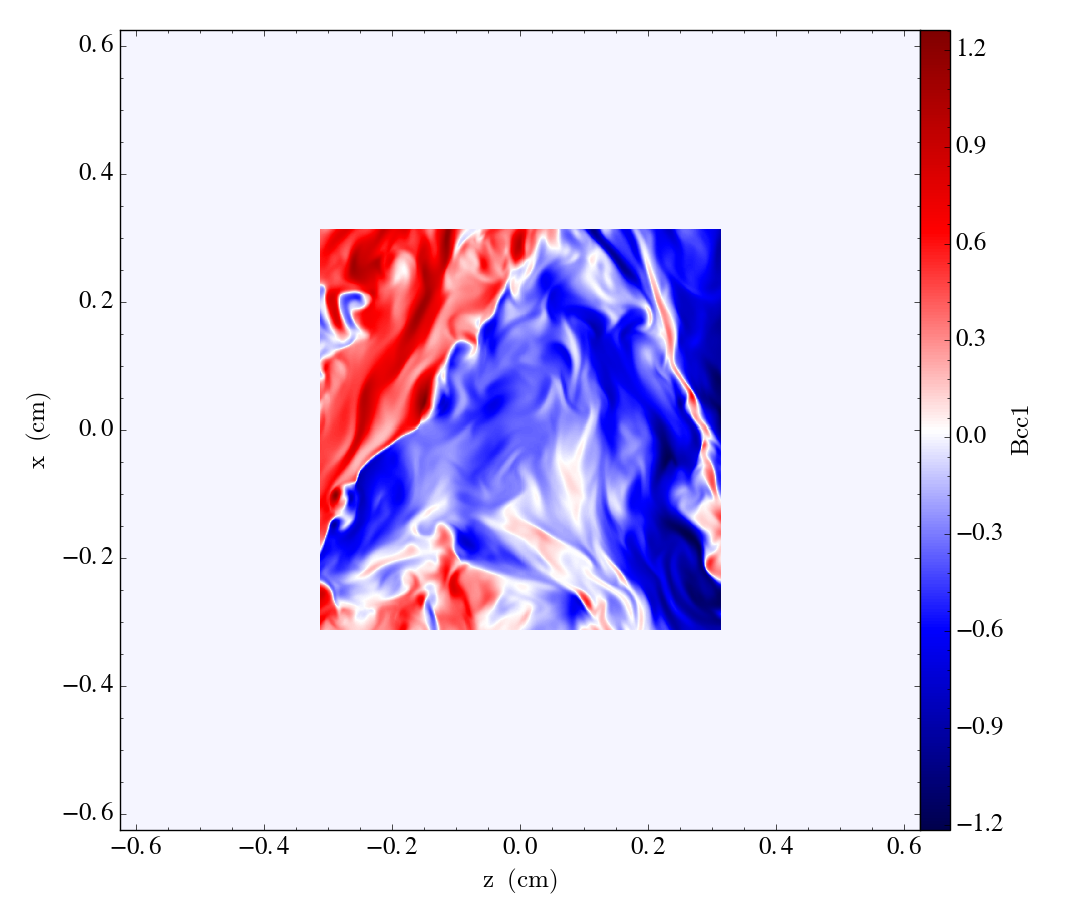

In [58]:
s=yt.SlicePlot(ds,"y","Bcc1")
s.set_log("Bcc1",False)
s.set_cmap("Bcc1","seismic")
s.zoom(0.5)
s.show()